<a href="https://colab.research.google.com/github/Ruthvik7382/Sales-prediction/blob/main/New_Time_Series_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  #any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
from matplotlib.pylab import rcParams #used to customize all kinds of properties in matplotlib
rcParams['figure.figsize'] = 15, 6

In [ ]:
dataset = pd.read_excel('/home/shyam/Documents/Class handson/Regular Batch/cabm.xlsx')

In [ ]:
dataset.head()

,Month,Sales
0,2018-04,211
1,2018-05,230
2,2018-06,218
3,2018-07,212
4,2018-08,272


In [ ]:
dataset['Month']=pd.to_datetime(dataset['Month'])
indexedDataset=dataset.set_index(['Month'])

In [ ]:
indexedDataset

,Sales
Month,
2018-04-01,211
2018-05-01,230
2018-06-01,218
2018-07-01,212
2018-08-01,272
2018-09-01,174
2018-10-01,205
2018-11-01,165
2018-12-01,277


In [ ]:
from datetime import datetime
indexedDataset.head()

,Sales
Month,
2018-04-01,211
2018-05-01,230
2018-06-01,218
2018-07-01,212
2018-08-01,272


/home/shyam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


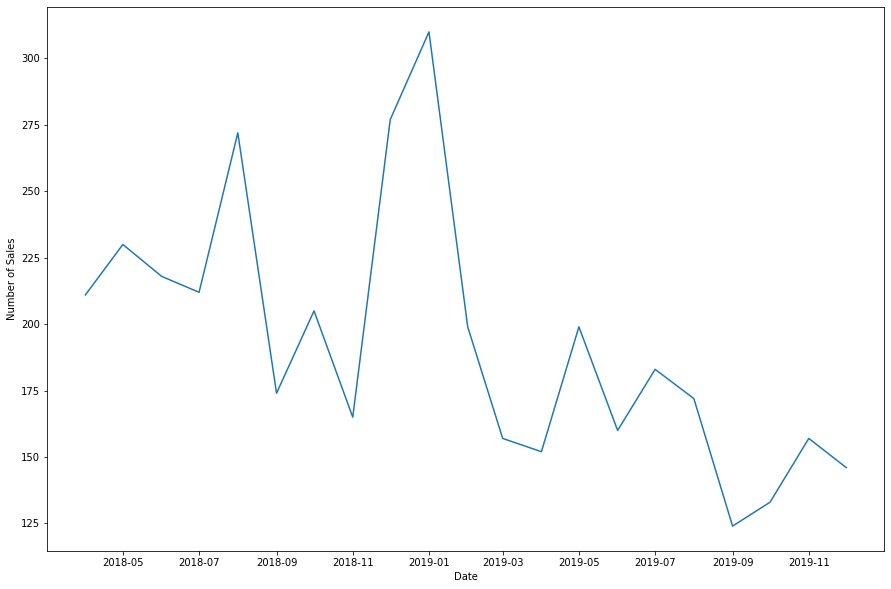

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.plot(indexedDataset)

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

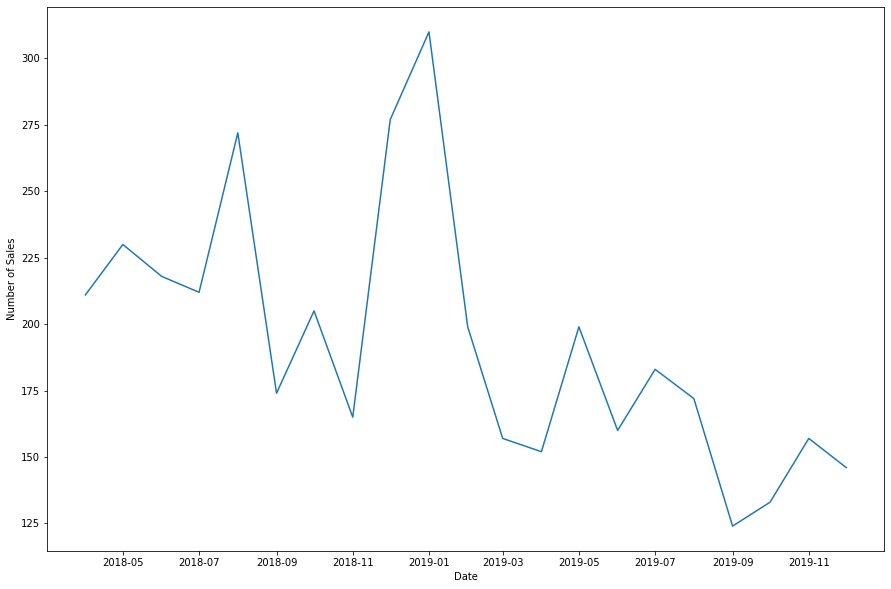

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.plot(indexedDataset)

In [ ]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                 Sales
Month                 
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01         NaN
2019-01-01         NaN
2019-02-01         NaN
2019-03-01  219.166667
2019-04-01  214.250000
2019-05-01  211.666667
2019-06-01  206.833333
2019-07-01  204.416667
2019-08-01  196.083333
2019-09-01  191.916667
2019-10-01  185.916667
2019-11-01  185.250000
2019-12-01  174.333333                 Sales
Month                
2018-04-01        NaN
2018-05-01        NaN
2018-06-01        NaN
2018-07-01        NaN
2018-08-01        NaN
2018-09-01        NaN
2018-10-01        NaN
2018-11-01        NaN
2018-12-01        NaN
2019-01-01        NaN
2019-02-01        NaN
2019-03-01  46.777682
2019-04-01  50.654130
2019-05-01  50.568286
2019-06-01  52.637410
2019-07-01  53.042793
2019-08-01  49.174011
2019-09-01  53.171179
2019-10-01  55.568890
2019-11-0

Text(0.5, 1.0, 'Rolling mean and standard deviation')

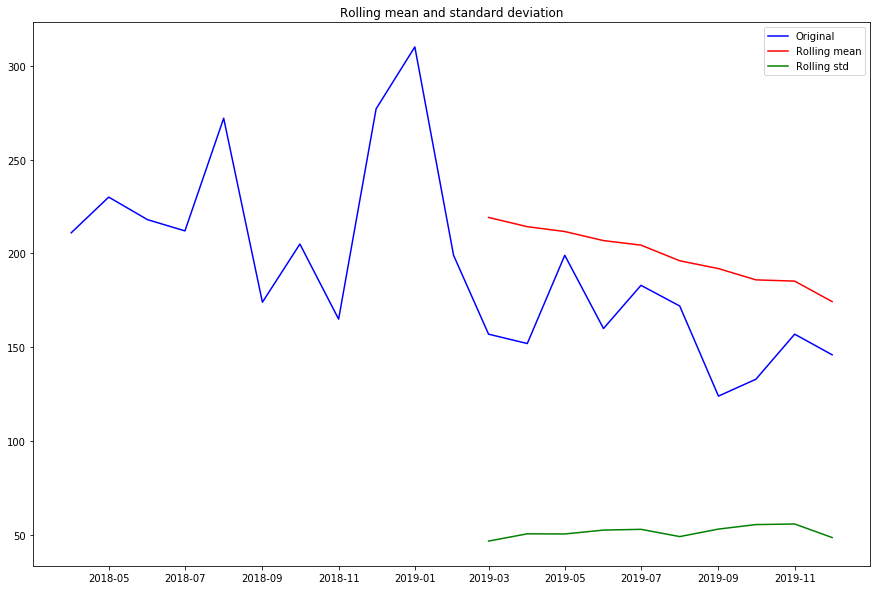

In [ ]:
plt.figure(figsize=(15,10))
orig=plt.plot(indexedDataset, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling mean')
std=plt.plot(rolstd, color='green', label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
#plt.show(block=False)


In [ ]:
# Dickey filler test

from statsmodels.tsa.stattools import adfuller

print('Results')
dftest=adfuller(indexedDataset['Sales'], autolag='AIC') #https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

dfoutput=pd.Series(dftest[0:4], index=['test statistic','p value','Lags used','Number of observations'])   # [0:4 ] defines first four values passengers dataset as sample 
for key, value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value
    
print(dfoutput)

Results
test statistic             0.637081
p value                    0.988495
Lags used                  8.000000
Number of observations    12.000000
Critical value(1%)        -4.137829
Critical value(5%)        -3.154972
Critical value(10%)       -2.714477
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Results')
dftest=adfuller(indexedDataset['Sales']) #https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

dfoutput=pd.Series(dftest[0:4], index=['test statistic','p value','Lags used','Number of observations'])
for key, value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value
    
print(dfoutput)

Results
test statistic             0.637081
p value                    0.988495
Lags used                  8.000000
Number of observations    12.000000
Critical value(1%)        -4.137829
Critical value(5%)        -3.154972
Critical value(10%)       -2.714477
dtype: float64


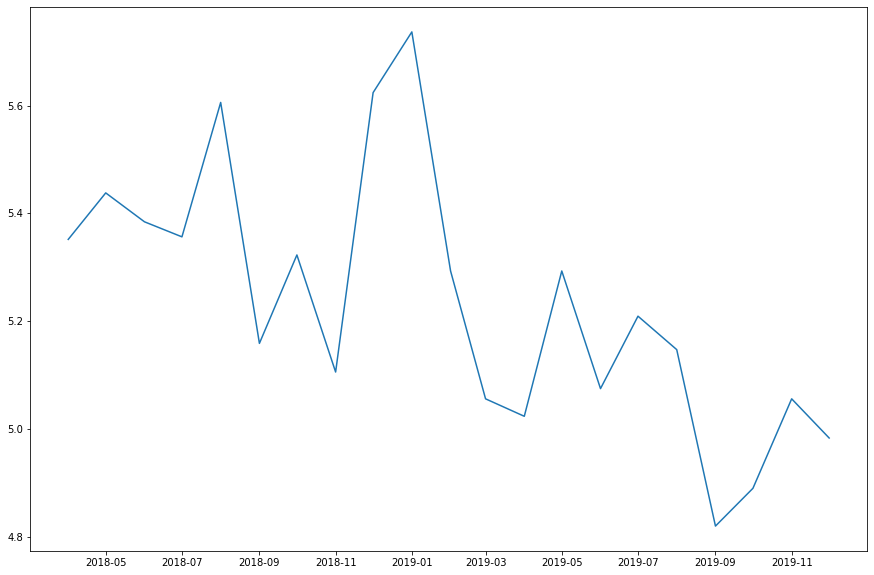

In [ ]:
#estimating trend
plt.figure(figsize=(15,10))
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

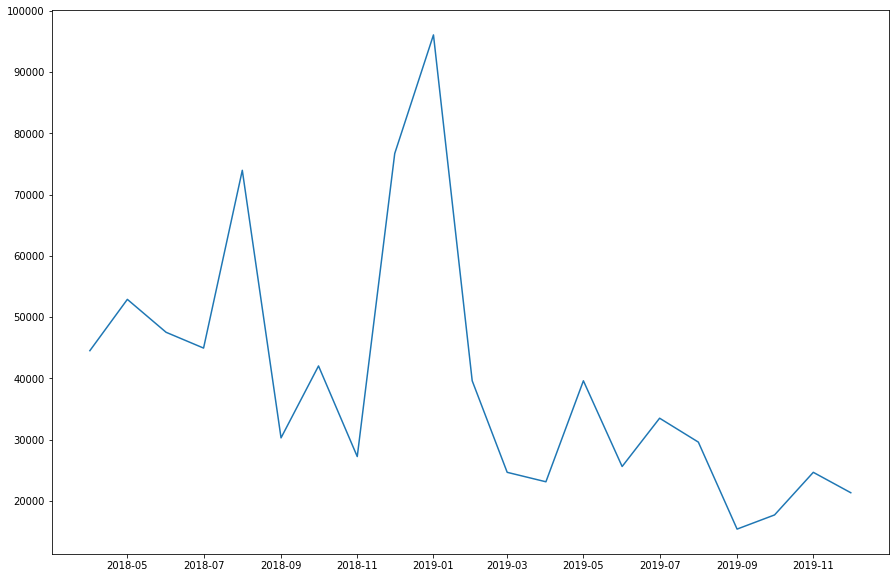

In [ ]:
plt.figure(figsize=(15,10))
indexedDataset_SqScale=np.square(indexedDataset)
plt.plot(indexedDataset_SqScale)

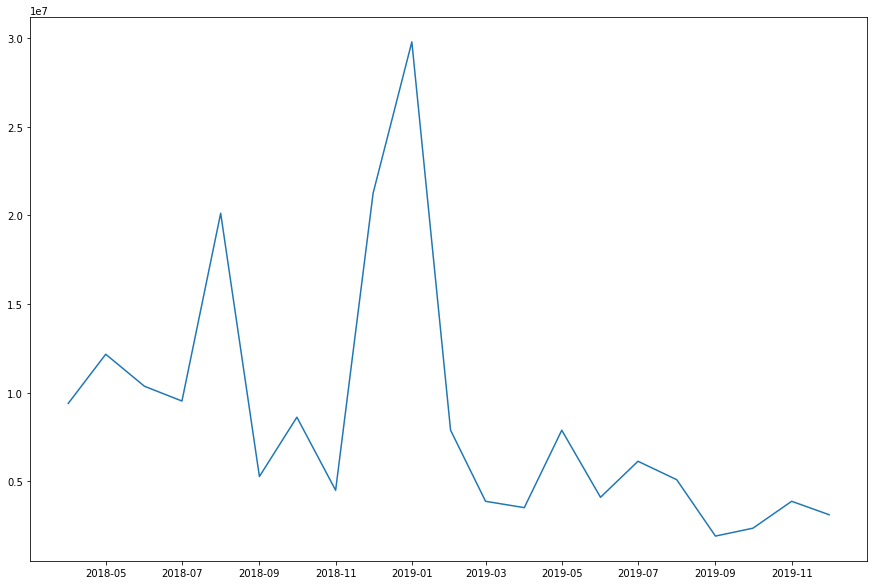

In [ ]:
plt.figure(figsize=(15,10))
indexedDataset_CubScale=np.power(indexedDataset, 3)
plt.plot(indexedDataset_CubScale)

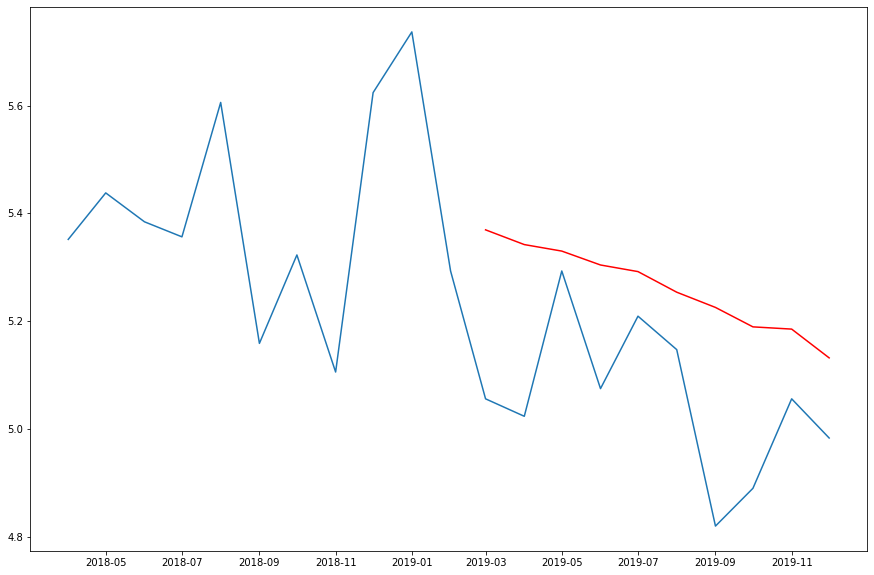

In [ ]:
# moving statistics for log
plt.figure(figsize=(15,10))
movingaverage=indexedDataset_logScale.rolling(window=12).mean()
movingstd=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')

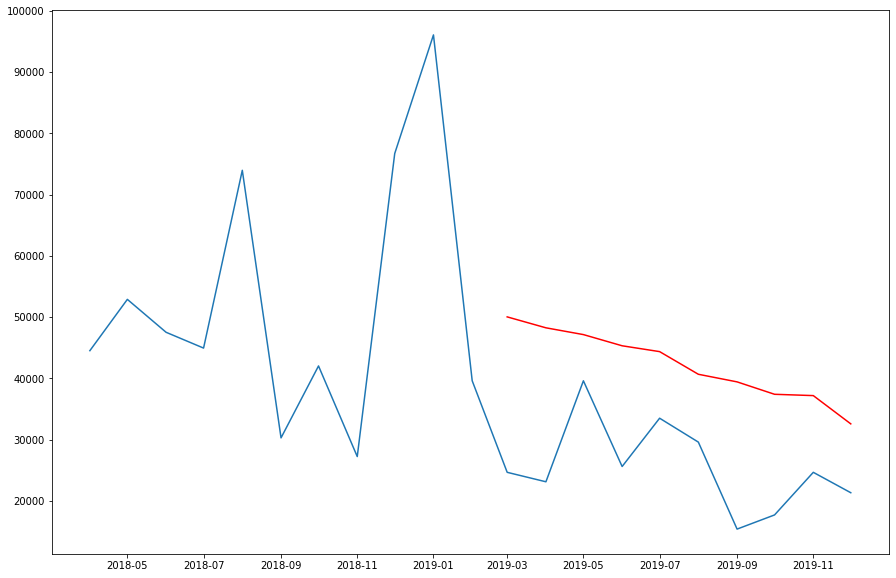

In [ ]:
# moving statistics for Square
plt.figure(figsize=(15,10))
movingaverage=indexedDataset_SqScale.rolling(window=12).mean()
movingstd=indexedDataset_SqScale.rolling(window=12).std()
plt.plot(indexedDataset_SqScale)
plt.plot(movingaverage, color='red')

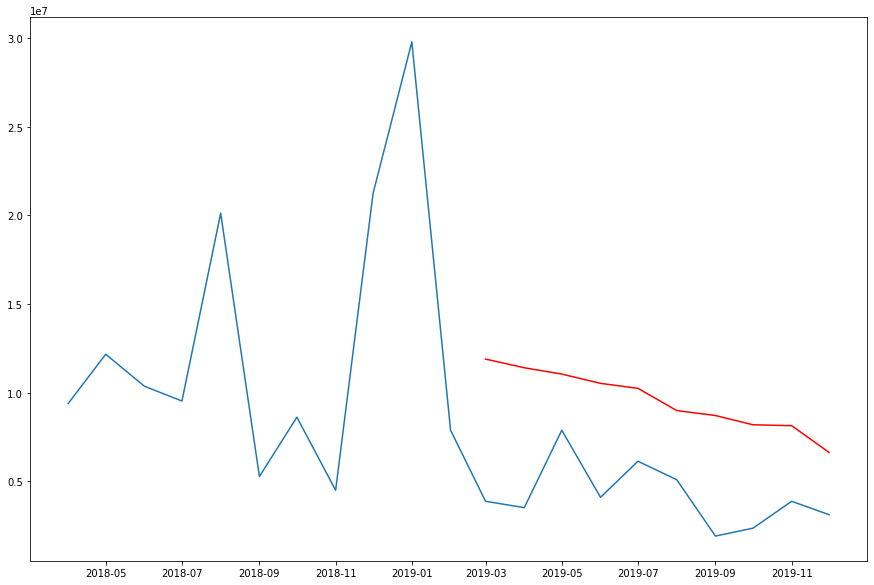

In [ ]:
# moving statistics for Cubic
plt.figure(figsize=(15,10))
movingaverage=indexedDataset_CubScale.rolling(window=12).mean()
movingstd=indexedDataset_CubScale.rolling(window=12).std()
plt.plot(indexedDataset_CubScale)
plt.plot(movingaverage, color='red')

In [ ]:
datasetlogscaleminusmovingaverage=indexedDataset_logScale - movingaverage
datasetlogscaleminusmovingaverage.head(12)

datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head(10)

,Sales
Month,
2019-03-01,-1.189530e+07
2019-04-01,-1.140512e+07
2019-05-01,-1.104792e+07
2019-06-01,-1.052590e+07
2019-07-01,-1.024260e+07
2019-08-01,-8.989665e+06
2019-09-01,-8.709549e+06
2019-10-01,-8.187675e+06
2019-11-01,-8.135822e+06


In [ ]:
datasetSqscaleminusmovingaverage=indexedDataset_SqScale - movingaverage
datasetSqscaleminusmovingaverage.head(12)

datasetSqscaleminusmovingaverage.dropna(inplace=True)
datasetSqscaleminusmovingaverage.head(10)

,Sales
Month,
2019-03-01,-1.187065e+07
2019-04-01,-1.138202e+07
2019-05-01,-1.100833e+07
2019-06-01,-1.050031e+07
2019-07-01,-1.020911e+07
2019-08-01,-8.960086e+06
2019-09-01,-8.694177e+06
2019-10-01,-8.169990e+06
2019-11-01,-8.111178e+06


In [ ]:
datasetCubscaleminusmovingaverage=indexedDataset_CubScale - movingaverage
datasetCubscaleminusmovingaverage.head(12)

datasetCubscaleminusmovingaverage.dropna(inplace=True)
datasetCubscaleminusmovingaverage.head(10)

,Sales
Month,
2019-03-01,-8.025410e+06
2019-04-01,-7.893318e+06
2019-05-01,-3.167327e+06
2019-06-01,-6.429907e+06
2019-07-01,-4.114116e+06
2019-08-01,-3.901222e+06
2019-09-01,-6.802929e+06
2019-10-01,-5.835042e+06
2019-11-01,-4.265934e+06


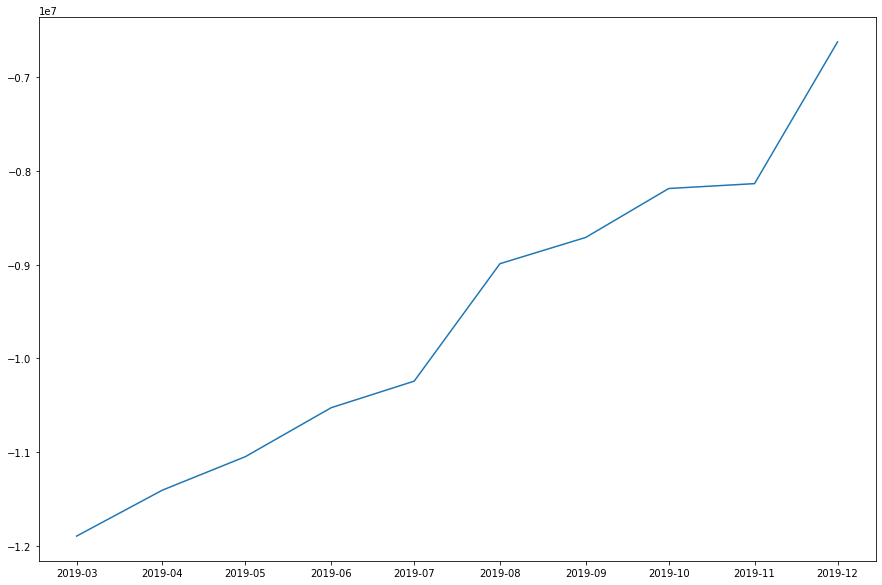

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(datasetlogscaleminusmovingaverage)

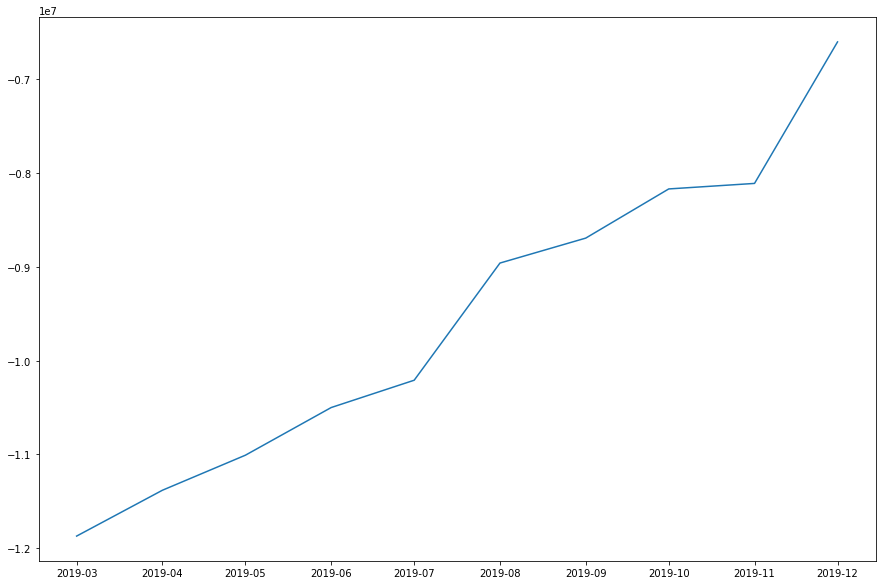

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(datasetSqscaleminusmovingaverage)

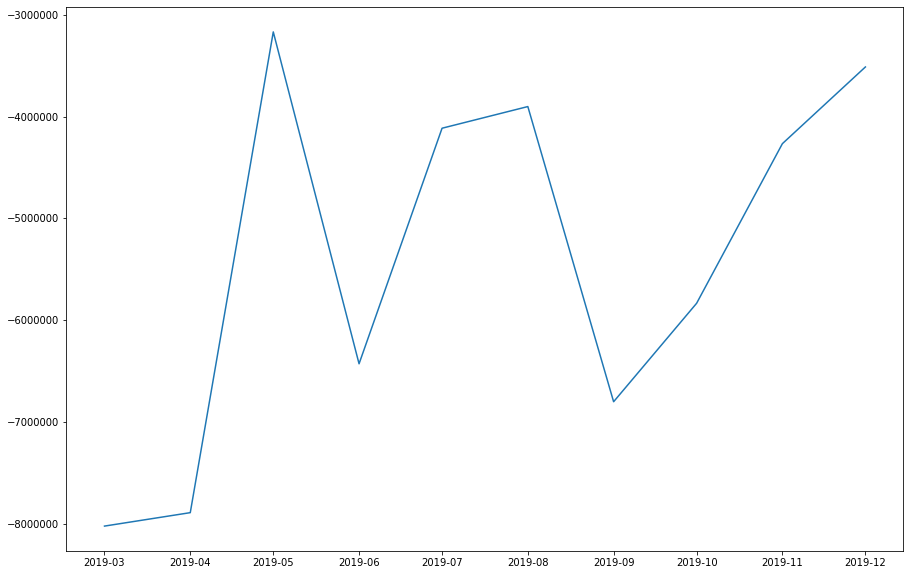

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(datasetCubscaleminusmovingaverage)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingaverage=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()

    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingaverage, color='red', label='Rollingmean')
    std=plt.plot(movingstd, color='black', label='Rollingstd')
    plt.legend(loc='best')
    plt.title("Rolling meand and std")
    plt.show(block=False)
    
    print("Results of df test")
    dftest=adfuller(timeseries["Sales"], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','pvalue','lags','number of observations'])
    for key, value in dftest[4].items():
        dfoutput['critical value(%s)'%key]= value
    print(dfoutput)
    

    

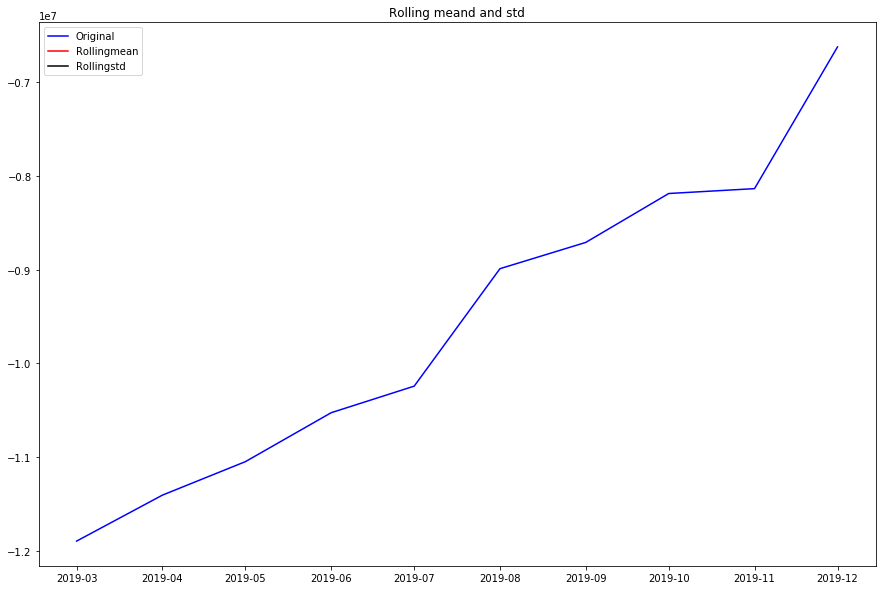

Results of df test
Test Statistics           0.713599
pvalue                    0.990105
lags                      3.000000
number of observations    6.000000
critical value(1%)       -5.354256
critical value(5%)       -3.646238
critical value(10%)      -2.901198
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
#plt.yticks(-1,0)
test_stationarity(datasetlogscaleminusmovingaverage)

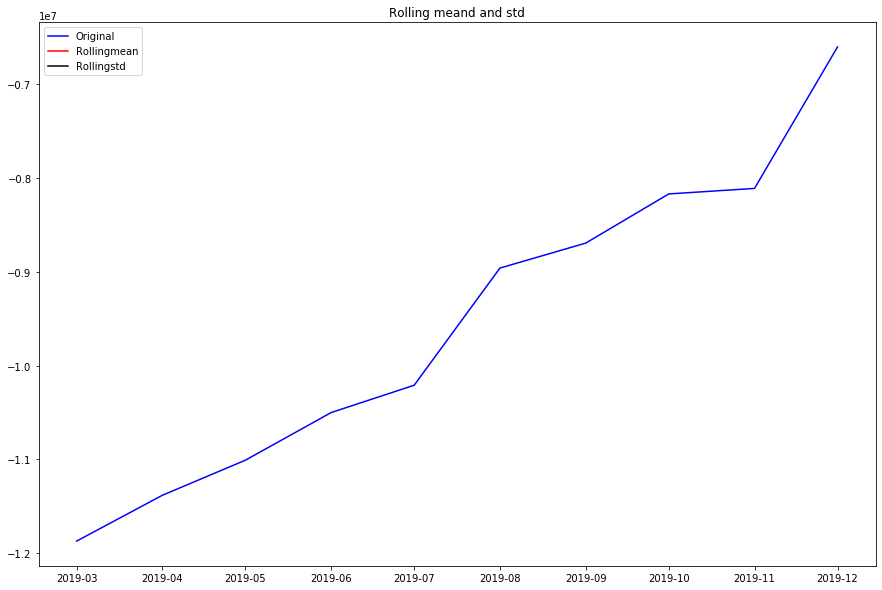

Results of df test
Test Statistics           0.670744
pvalue                    0.989236
lags                      3.000000
number of observations    6.000000
critical value(1%)       -5.354256
critical value(5%)       -3.646238
critical value(10%)      -2.901198
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
#plt.yticks(-1,0)
test_stationarity(datasetSqscaleminusmovingaverage)

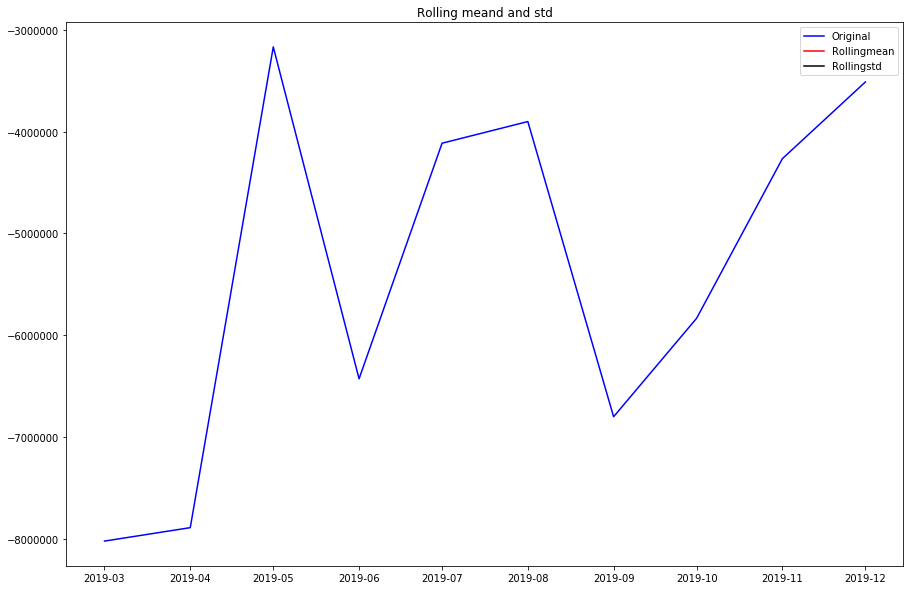

Results of df test
Test Statistics          -6.043249e+00
pvalue                    1.330401e-07
lags                      3.000000e+00
number of observations    6.000000e+00
critical value(1%)       -5.354256e+00
critical value(5%)       -3.646238e+00
critical value(10%)      -2.901198e+00
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
#plt.yticks(-1,0)
test_stationarity(datasetCubscaleminusmovingaverage)

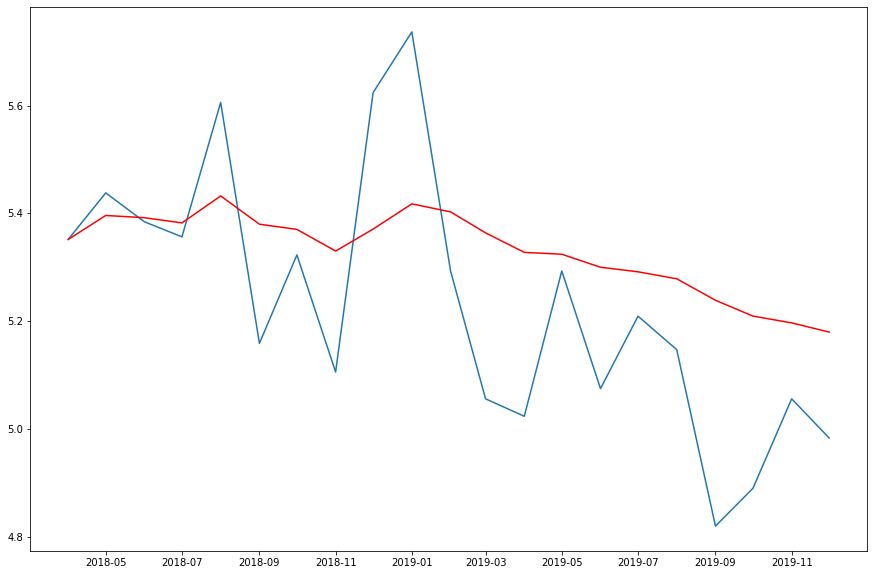

In [ ]:
plt.figure(figsize=(15,10))
exponentialdecayweightedaverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialdecayweightedaverage , color='red')

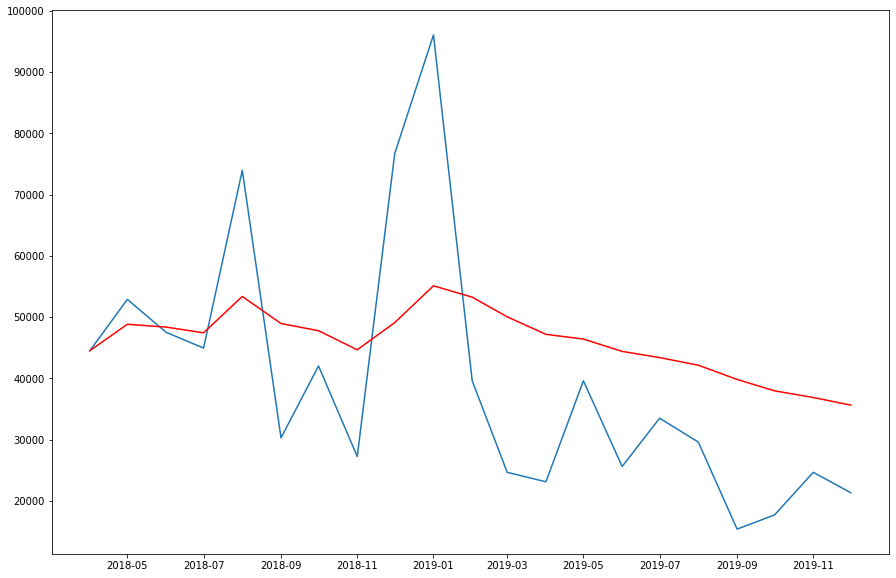

In [ ]:
plt.figure(figsize=(15,10))
exponentialdecayweightedaverageSq=indexedDataset_SqScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_SqScale)
plt.plot(exponentialdecayweightedaverageSq , color='red')

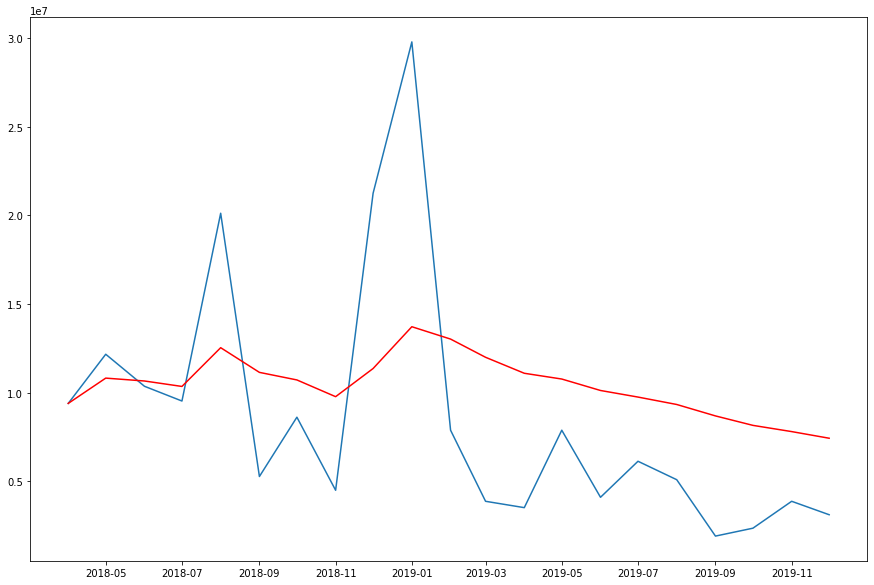

In [ ]:
plt.figure(figsize=(15,10))
exponentialdecayweightedaverageCub=indexedDataset_CubScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_CubScale)
plt.plot(exponentialdecayweightedaverageCub , color='red')

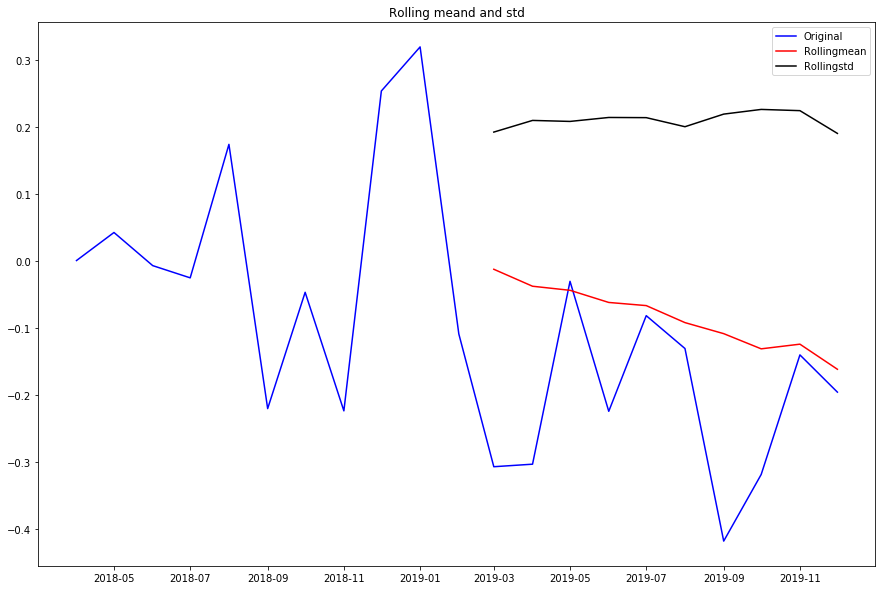

Results of df test
Test Statistics            0.654616
pvalue                     0.988887
lags                       8.000000
number of observations    12.000000
critical value(1%)        -4.137829
critical value(5%)        -3.154972
critical value(10%)       -2.714477
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
datasetlogscaleminusmovingexponentialdecayavg=indexedDataset_logScale - exponentialdecayweightedaverage
test_stationarity(datasetlogscaleminusmovingexponentialdecayavg)

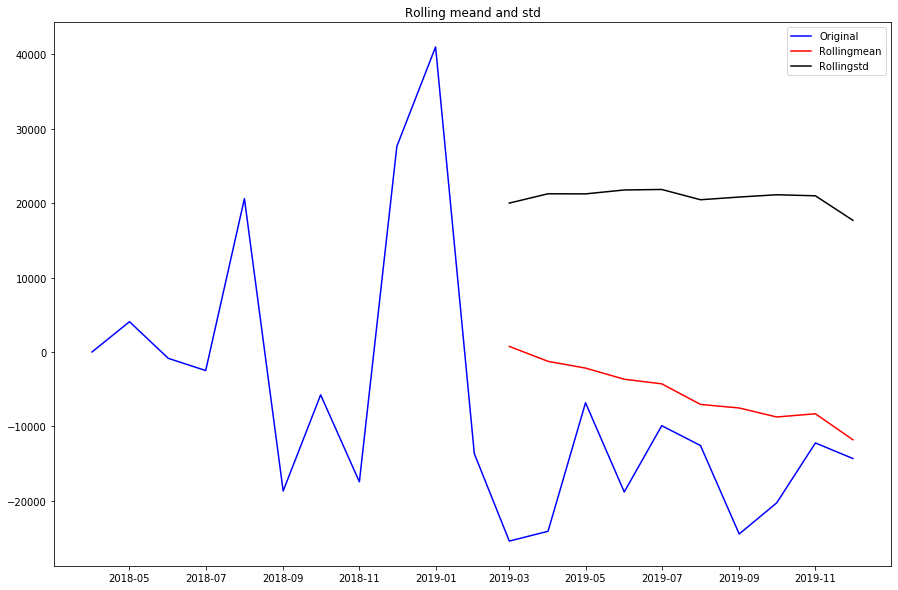

Results of df test
Test Statistics           -0.351085
pvalue                     0.917951
lags                       8.000000
number of observations    12.000000
critical value(1%)        -4.137829
critical value(5%)        -3.154972
critical value(10%)       -2.714477
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
datasetSqscaleminusmovingexponentialdecayavg=indexedDataset_SqScale - exponentialdecayweightedaverageSq
test_stationarity(datasetSqscaleminusmovingexponentialdecayavg)

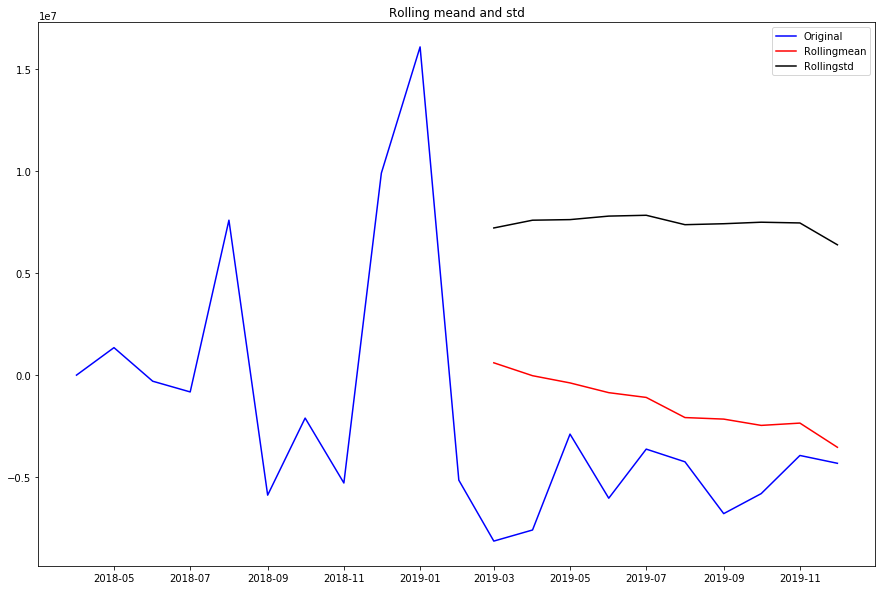

Results of df test
Test Statistics           -2.989583
pvalue                     0.035879
lags                       1.000000
number of observations    19.000000
critical value(1%)        -3.832603
critical value(5%)        -3.031227
critical value(10%)       -2.655520
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
datasetCubscaleminusmovingexponentialdecayavg=indexedDataset_CubScale - exponentialdecayweightedaverageCub
test_stationarity(datasetCubscaleminusmovingexponentialdecayavg)

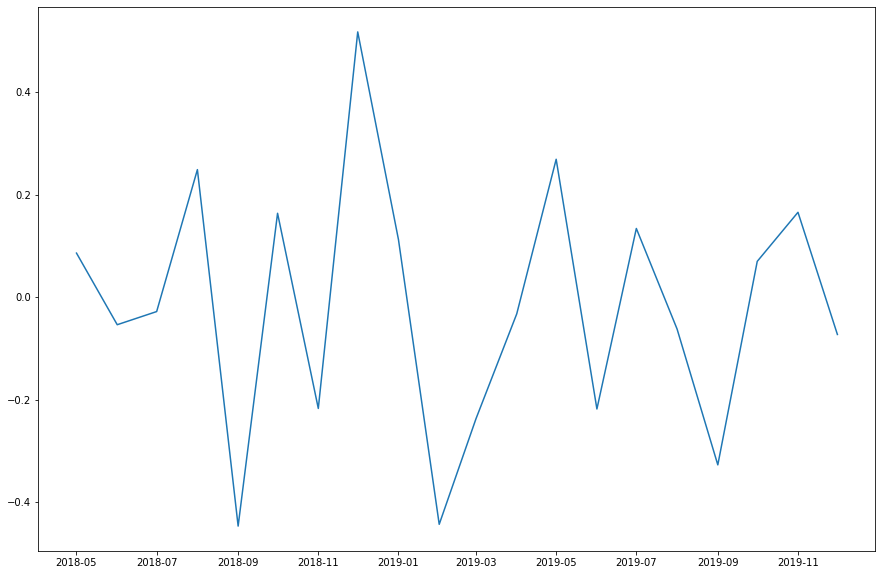

In [ ]:
plt.figure(figsize=(15,10))
datasetLogdiffshifting=indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogdiffshifting)

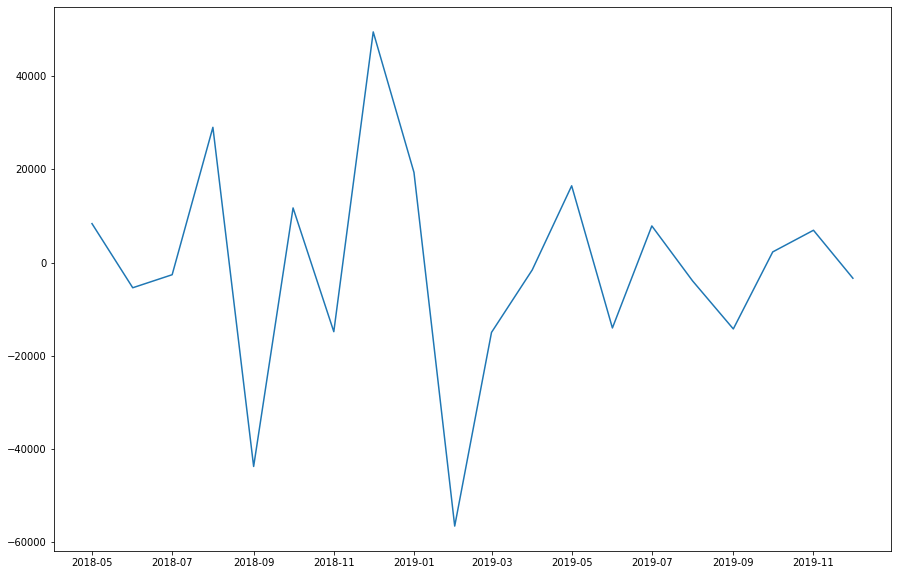

In [ ]:
plt.figure(figsize=(15,10))
datasetSqdiffshifting=indexedDataset_SqScale - indexedDataset_SqScale.shift()
plt.plot(datasetSqdiffshifting)

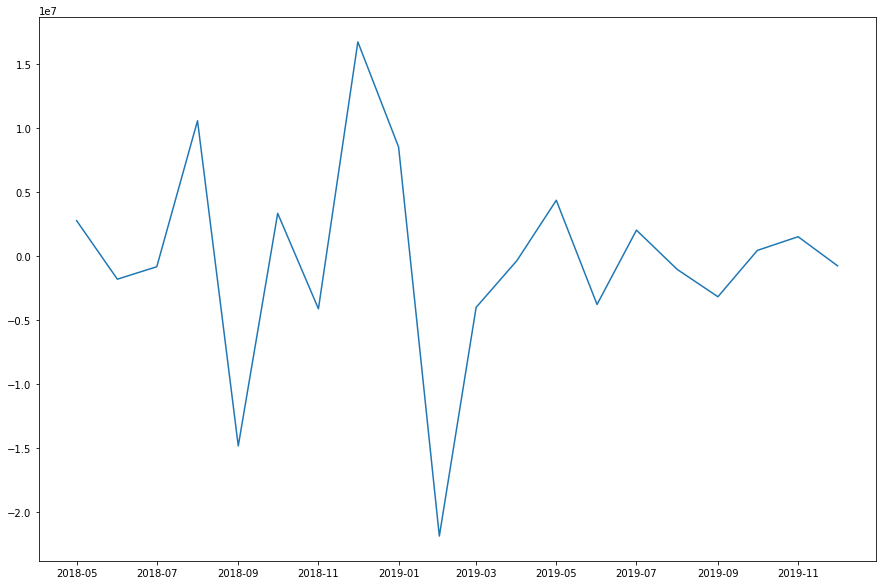

In [ ]:
plt.figure(figsize=(15,10))
datasetCubdiffshifting=indexedDataset_CubScale - indexedDataset_CubScale.shift()
plt.plot(datasetCubdiffshifting)

In [ ]:
indexedDataset_logScale.shift().head()

,Sales
Month,
2018-04-01,NaN
2018-05-01,5.351858
2018-06-01,5.438079
2018-07-01,5.384495
2018-08-01,5.356586


In [ ]:
indexedDataset_SqScale.shift().head()

,Sales
Month,
2018-04-01,NaN
2018-05-01,44521.0
2018-06-01,52900.0
2018-07-01,47524.0
2018-08-01,44944.0


In [ ]:
indexedDataset_CubScale.shift().head()

,Sales
Month,
2018-04-01,NaN
2018-05-01,9393931.0
2018-06-01,12167000.0
2018-07-01,10360232.0
2018-08-01,9528128.0


In [ ]:
datasetLogdiffshifting.head()

,Sales
Month,
2018-04-01,NaN
2018-05-01,0.086221
2018-06-01,-0.053584
2018-07-01,-0.027909
2018-08-01,0.249216


In [ ]:
datasetSqdiffshifting.head()

,Sales
Month,
2018-04-01,NaN
2018-05-01,8379.0
2018-06-01,-5376.0
2018-07-01,-2580.0
2018-08-01,29040.0


In [ ]:
datasetCubdiffshifting.head()

,Sales
Month,
2018-04-01,NaN
2018-05-01,2773069.0
2018-06-01,-1806768.0
2018-07-01,-832104.0
2018-08-01,10595520.0


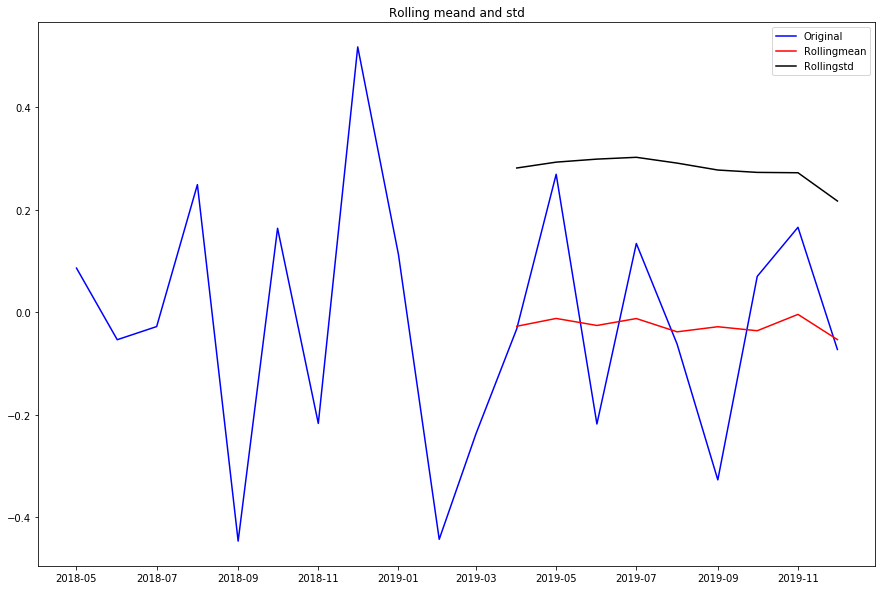

Results of df test
Test Statistics           -2.049103
pvalue                     0.265467
lags                       8.000000
number of observations    11.000000
critical value(1%)        -4.223238
critical value(5%)        -3.189369
critical value(10%)       -2.729839
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
datasetLogdiffshifting.dropna(inplace=True)
test_stationarity(datasetLogdiffshifting)

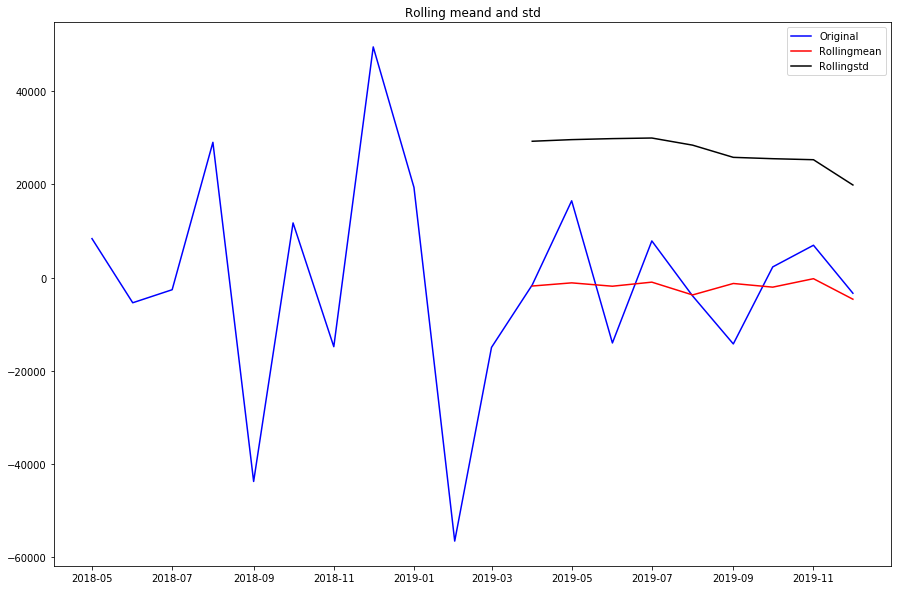

Results of df test
Test Statistics          -7.319759e+00
pvalue                    1.202770e-10
lags                      8.000000e+00
number of observations    1.100000e+01
critical value(1%)       -4.223238e+00
critical value(5%)       -3.189369e+00
critical value(10%)      -2.729839e+00
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
datasetSqdiffshifting.dropna(inplace=True)
test_stationarity(datasetSqdiffshifting)

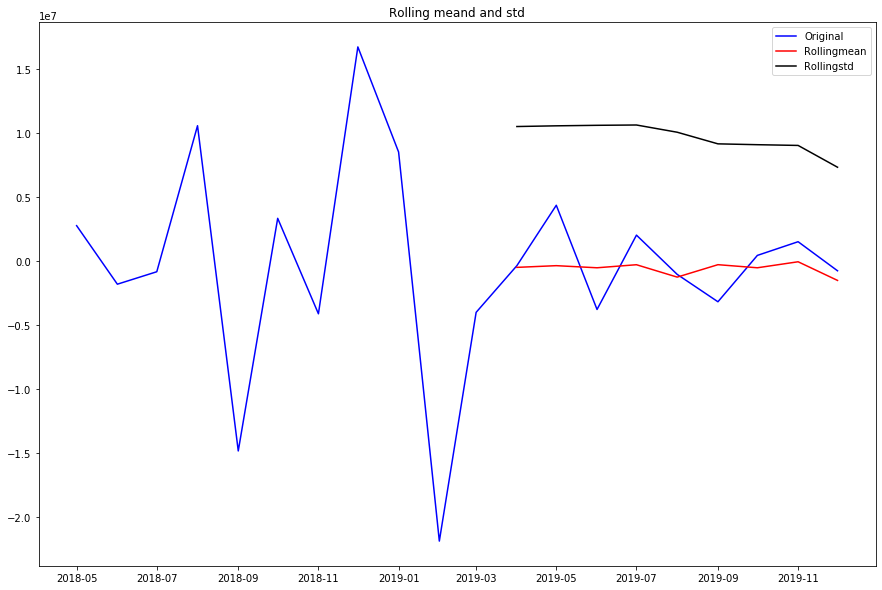

Results of df test
Test Statistics           -4.564985
pvalue                     0.000150
lags                       8.000000
number of observations    11.000000
critical value(1%)        -4.223238
critical value(5%)        -3.189369
critical value(10%)       -2.729839
dtype: float64


In [ ]:
plt.figure(figsize=(15,10))
datasetCubdiffshifting.dropna(inplace=True)
test_stationarity(datasetCubdiffshifting)

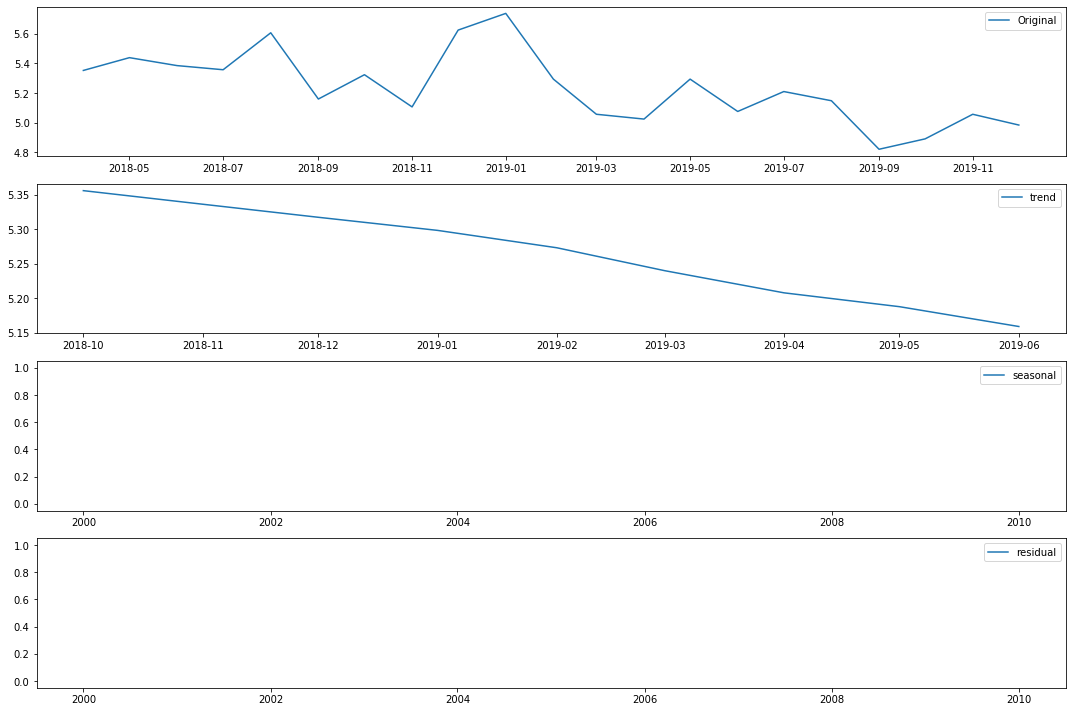

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(indexedDataset_logScale)

trend= decomposition.trend
seasonal=decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()



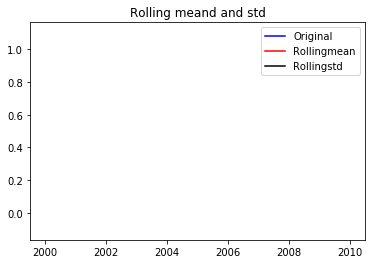

Results of df test


ValueError: sample size is too short to use selected regression component

In [ ]:
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
test_stationarity(decomposedLogdata)

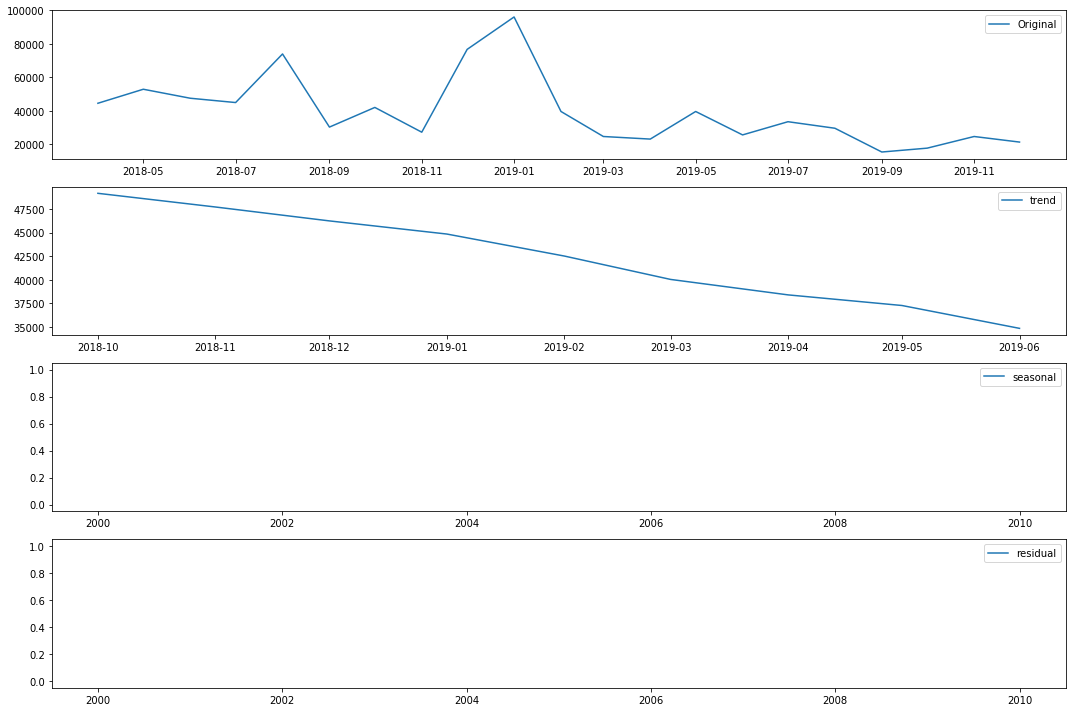

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(indexedDataset_SqScale)

trend= decomposition.trend
seasonal=decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_SqScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

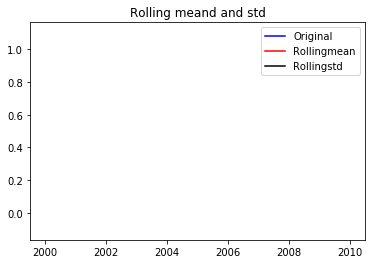

Results of df test


ValueError: sample size is too short to use selected regression component

In [ ]:
decomposedSqdata=residual
decomposedSqdata.dropna(inplace=True)
test_stationarity(decomposedSqdata)

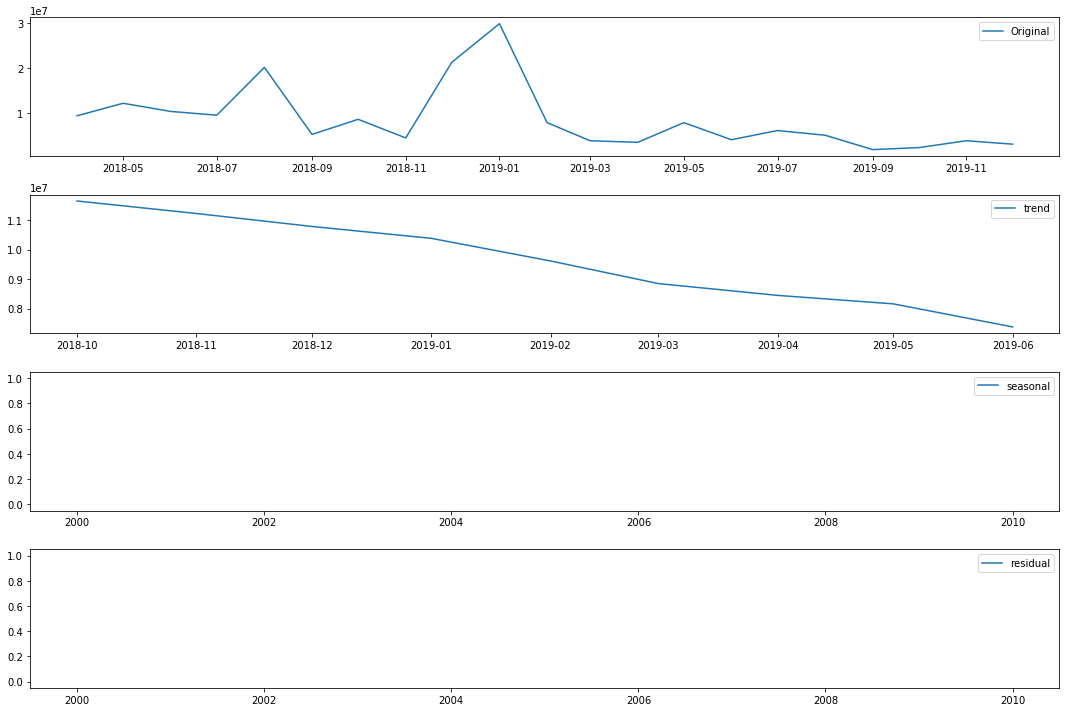

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(indexedDataset_CubScale)

trend= decomposition.trend
seasonal=decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_CubScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()

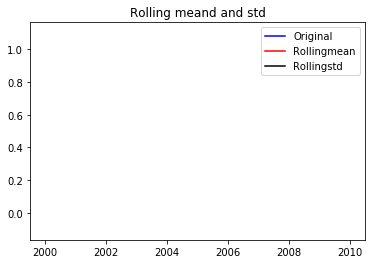

Results of df test


ValueError: sample size is too short to use selected regression component

In [ ]:
decomposedCubdata=residual
decomposedCubdata.dropna(inplace=True)
test_stationarity(decomposedCubdata)

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


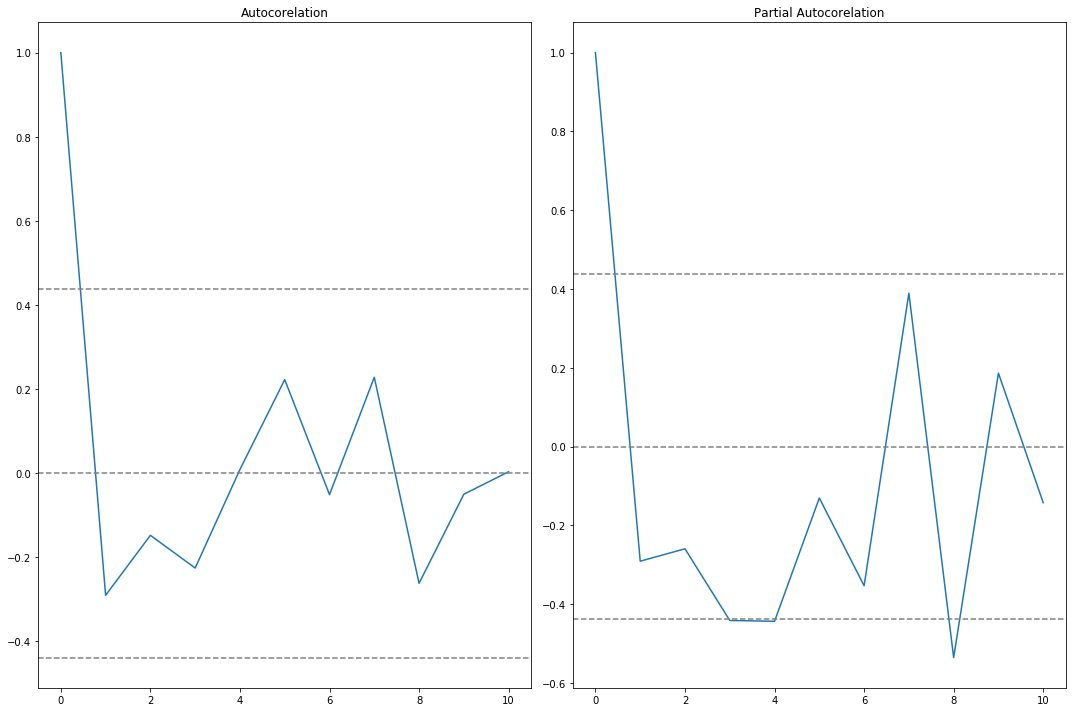

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogdiffshifting, nlags=10)
lag_pacf=pacf(datasetLogdiffshifting, nlags=10, method='ols')
# http://www.math.armstrong.edu/statsonline/5/5.3.2.html   value 1.96 taken for 5%
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogdiffshifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogdiffshifting)), linestyle='--',color='gray')
plt.title('Autocorelation')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogdiffshifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogdiffshifting)), linestyle='--',color='gray')
plt.title('Partial Autocorelation')
plt.tight_layout()





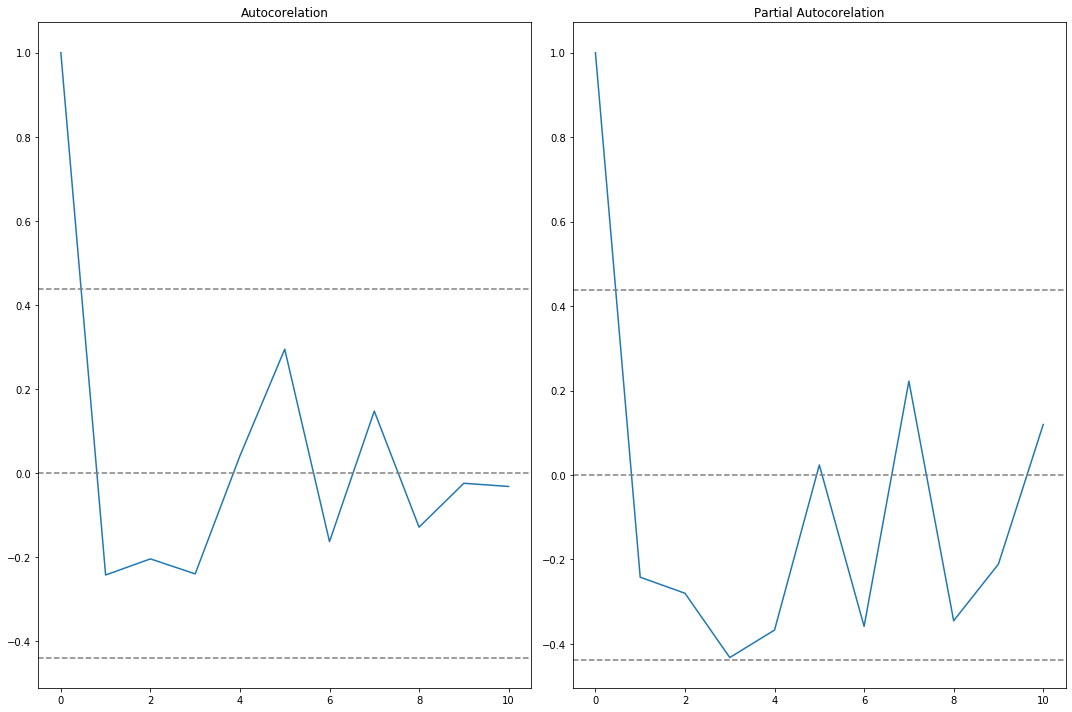

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetSqdiffshifting, nlags=10)
lag_pacf=pacf(datasetSqdiffshifting, nlags=10, method='ols')
# http://www.math.armstrong.edu/statsonline/5/5.3.2.html   value 1.96 taken for 5%
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetSqdiffshifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetSqdiffshifting)), linestyle='--',color='gray')
plt.title('Autocorelation')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetSqdiffshifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetSqdiffshifting)), linestyle='--',color='gray')
plt.title('Partial Autocorelation')
plt.tight_layout()


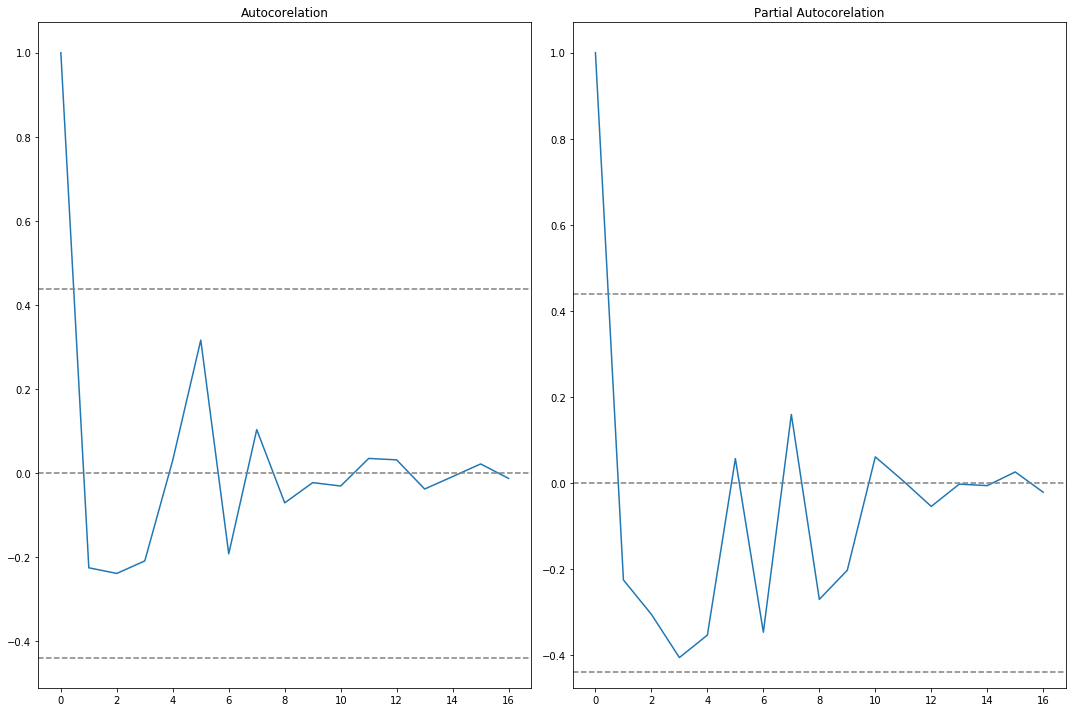

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetCubdiffshifting, nlags=16)
lag_pacf=pacf(datasetCubdiffshifting, nlags=16, method='ols')
# http://www.math.armstrong.edu/statsonline/5/5.3.2.html   value 1.96 taken for 5%
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetCubdiffshifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetCubdiffshifting)), linestyle='--',color='gray')
plt.title('Autocorelation')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetCubdiffshifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetCubdiffshifting)), linestyle='--',color='gray')
plt.title('Partial Autocorelation')
plt.tight_layout()


/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR plotting


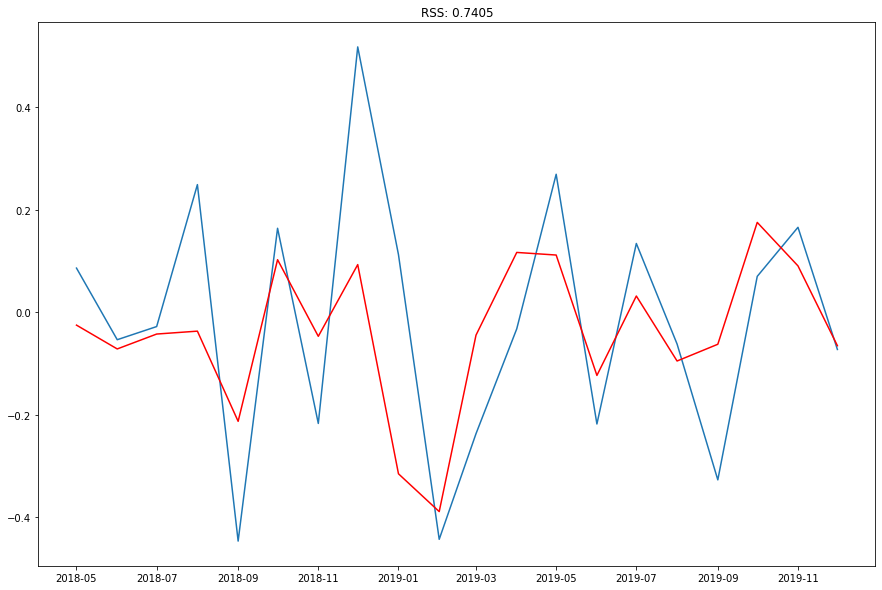

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.arima_model import ARIMA

#AR model
model=ARIMA(indexedDataset_logScale, order=(1,1,1))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogdiffshifting['Sales'])**2))
print("AR plotting")


/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR plotting


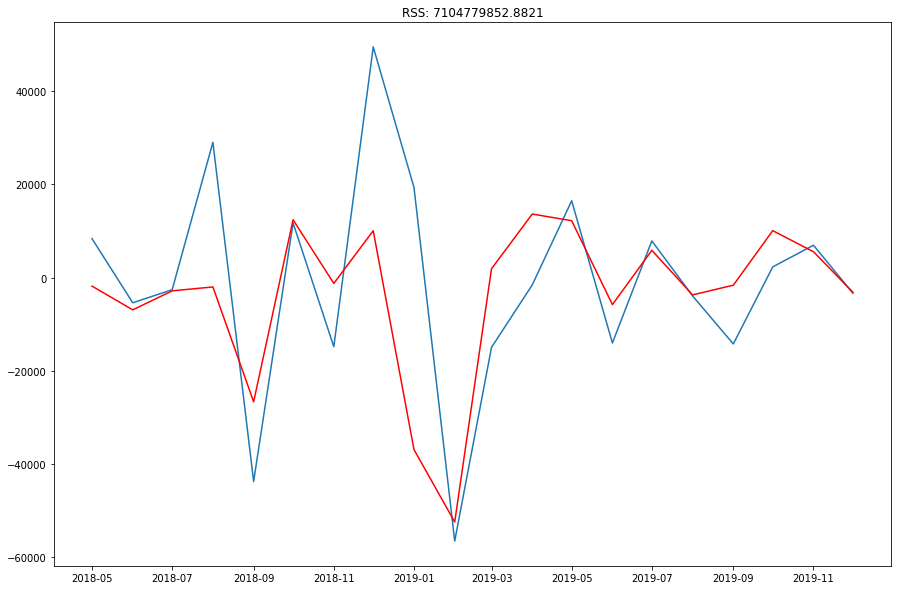

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.arima_model import ARIMA

#AR model
model=ARIMA(indexedDataset_SqScale, order=(0,1,1))
results_AR=model.fit(disp=-1)
plt.plot(datasetSqdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetSqdiffshifting['Sales'])**2))
print("AR plotting")


/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


AR plotting


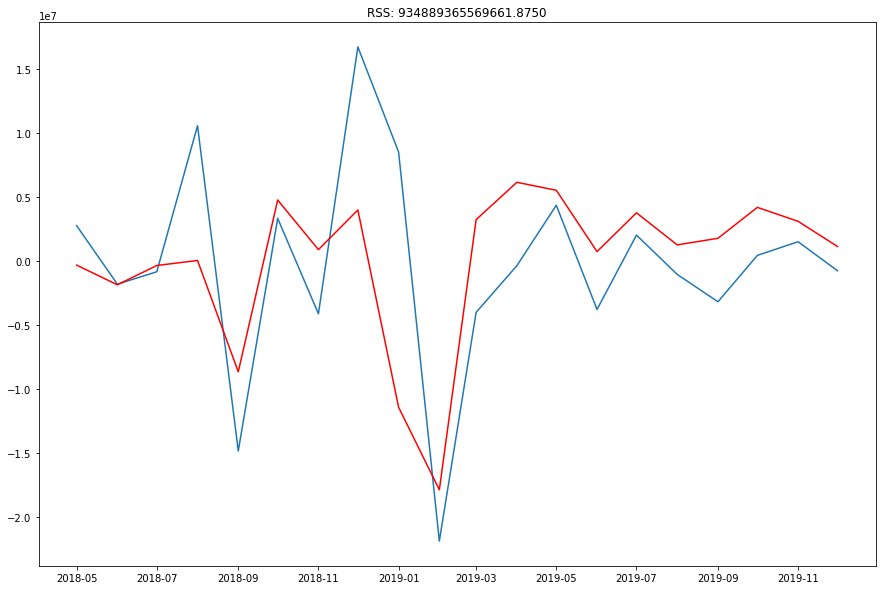

In [ ]:
plt.figure(figsize=(15,10))
from statsmodels.tsa.arima_model import ARIMA

#AR model
model=ARIMA(indexedDataset_CubScale, order=(0,1,1))
results_AR=model.fit(disp=-1)
plt.plot(datasetCubdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetCubdiffshifting['Sales'])**2))
print("AR plotting")


/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


MA plotting


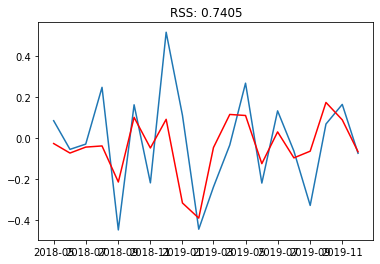

In [ ]:


#MA model
model=ARIMA(indexedDataset_logScale, order=(1,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogdiffshifting['Sales'])**2))
print("MA plotting")


/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


MA plotting


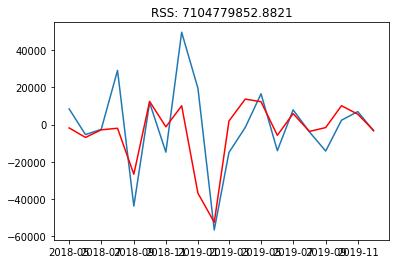

In [ ]:


#MA model
model=ARIMA(indexedDataset_SqScale, order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetSqdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetSqdiffshifting['Sales'])**2))
print("MA plotting")

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


MA plotting


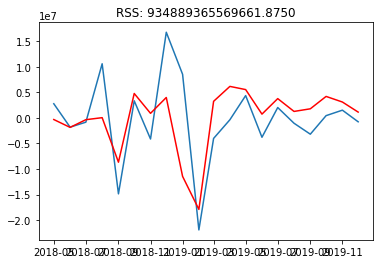

In [ ]:


#MA model
model=ARIMA(indexedDataset_CubScale, order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetCubdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetCubdiffshifting['Sales'])**2))
print("MA plotting")

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA plotting


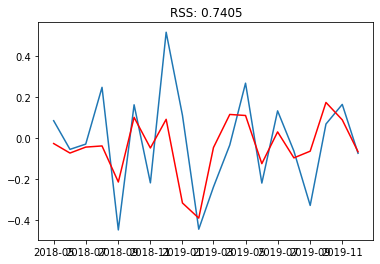

In [ ]:
model=ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMAlog=model.fit(disp=-1)
plt.plot(datasetLogdiffshifting)
plt.plot(results_ARIMAlog.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMAlog.fittedvalues-datasetLogdiffshifting['Sales'])**2))
print("ARIMA plotting")

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA plotting


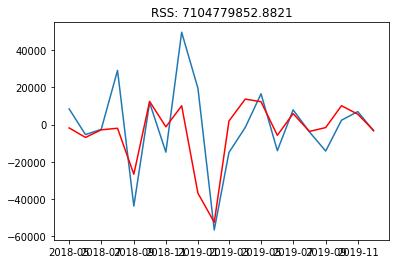

In [ ]:
model=ARIMA(indexedDataset_SqScale, order=(0,1,1))
results_ARIMASq=model.fit(disp=-1)
plt.plot(datasetSqdiffshifting)
plt.plot(results_ARIMASq.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMASq.fittedvalues-datasetSqdiffshifting['Sales'])**2))
print("ARIMA plotting")

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA plotting


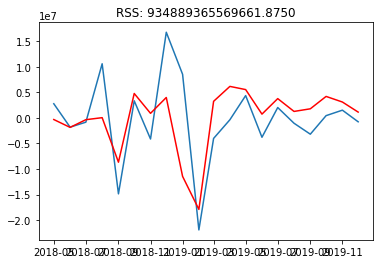

In [ ]:
model=ARIMA(indexedDataset_CubScale, order=(0,1,1))
results_ARIMACub=model.fit(disp=-1)
plt.plot(datasetCubdiffshifting)
plt.plot(results_ARIMACub.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMACub.fittedvalues-datasetCubdiffshifting['Sales'])**2))
print("ARIMA plotting")

In [ ]:
results_ARIMAlog.fittedvalues.head()

Month
2018-05-01   -0.025114
2018-06-01   -0.071606
2018-07-01   -0.042520
2018-08-01   -0.036861
2018-09-01   -0.212946
dtype: float64

In [ ]:
results_ARIMASq.fittedvalues.head()

Month
2018-05-01    -1805.606852
2018-06-01    -6897.910278
2018-07-01    -2820.213704
2018-08-01    -1985.767130
2018-09-01   -26626.220556
dtype: float64

In [ ]:
results_ARIMACub.fittedvalues.head()

Month
2018-05-01   -3.140898e+05
2018-06-01   -1.852099e+06
2018-07-01   -3.441290e+05
2018-08-01    4.883180e+04
2018-09-01   -8.661198e+06
dtype: float64

In [ ]:
predictions_ARIMAlog_diff=pd.Series(results_ARIMAlog.fittedvalues, copy=False)
print(predictions_ARIMAlog_diff.head())

Month
2018-05-01   -0.025114
2018-06-01   -0.071606
2018-07-01   -0.042520
2018-08-01   -0.036861
2018-09-01   -0.212946
dtype: float64


In [ ]:
predictions_ARIMASq_diff=pd.Series(results_ARIMASq.fittedvalues, copy=False)
print(predictions_ARIMASq_diff.head())

Month
2018-05-01    -1805.606852
2018-06-01    -6897.910278
2018-07-01    -2820.213704
2018-08-01    -1985.767130
2018-09-01   -26626.220556
dtype: float64


In [ ]:
predictions_ARIMACub_diff=pd.Series(results_ARIMACub.fittedvalues, copy=False)
print(predictions_ARIMACub_diff.head())

Month
2018-05-01   -3.140898e+05
2018-06-01   -1.852099e+06
2018-07-01   -3.441290e+05
2018-08-01    4.883180e+04
2018-09-01   -8.661198e+06
dtype: float64


In [ ]:
# convert to cummulative sum

predictions_ARIMAlog_diff_cumsum=predictions_ARIMAlog_diff.cumsum()
print(predictions_ARIMAlog_diff_cumsum.head())

Month
2018-05-01   -0.025114
2018-06-01   -0.096720
2018-07-01   -0.139240
2018-08-01   -0.176101
2018-09-01   -0.389047
dtype: float64


In [ ]:
predictions_ARIMASq_diff_cumsum=predictions_ARIMASq_diff.cumsum()
print(predictions_ARIMASq_diff_cumsum.head())

Month
2018-05-01    -1805.606852
2018-06-01    -8703.517130
2018-07-01   -11523.730834
2018-08-01   -13509.497964
2018-09-01   -40135.718520
dtype: float64


In [ ]:
predictions_ARIMACub_diff_cumsum=predictions_ARIMACub_diff.cumsum()
print(predictions_ARIMACub_diff_cumsum.head())

Month
2018-05-01   -3.140898e+05
2018-06-01   -2.166188e+06
2018-07-01   -2.510317e+06
2018-08-01   -2.461486e+06
2018-09-01   -1.112268e+07
dtype: float64


In [ ]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['Sales'].ix[0], index=indexedDataset_logScale.index)


/home/shyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [ ]:
predictions_ARIMA_log.head()

Month
2018-04-01    5.351858
2018-05-01    5.351858
2018-06-01    5.351858
2018-07-01    5.351858
2018-08-01    5.351858
dtype: float64

In [ ]:
predictions_ARIMA_Sq=pd.Series(indexedDataset_SqScale['Sales'].ix[0], index=indexedDataset_SqScale.index)


/home/shyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [ ]:
predictions_ARIMA_Sq.head()

Month
2018-04-01    44521
2018-05-01    44521
2018-06-01    44521
2018-07-01    44521
2018-08-01    44521
dtype: int64

In [ ]:
predictions_ARIMA_Cub=pd.Series(indexedDataset_CubScale['Sales'].ix[0], index=indexedDataset_CubScale.index)


/home/shyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [ ]:
predictions_ARIMA_Cub.head()

Month
2018-04-01    9393931
2018-05-01    9393931
2018-06-01    9393931
2018-07-01    9393931
2018-08-01    9393931
dtype: int64

In [ ]:
predictions_ARIMA_log.add(predictions_ARIMAlog_diff_cumsum, fill_value=0).head()

Month
2018-04-01    5.351858
2018-05-01    5.326744
2018-06-01    5.255138
2018-07-01    5.212618
2018-08-01    5.175758
dtype: float64

In [ ]:
predictions_ARIMA_Sq.add(predictions_ARIMASq_diff_cumsum, fill_value=0).head()

Month
2018-04-01    44521.000000
2018-05-01    42715.393148
2018-06-01    35817.482870
2018-07-01    32997.269166
2018-08-01    31011.502036
dtype: float64

In [ ]:
predictions_ARIMA_Cub.add(predictions_ARIMACub_diff_cumsum, fill_value=0).head()

Month
2018-04-01    9.393931e+06
2018-05-01    9.079841e+06
2018-06-01    7.227743e+06
2018-07-01    6.883614e+06
2018-08-01    6.932445e+06
dtype: float64

In [ ]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['Sales'].ix[0], index=indexedDataset_logScale.index)

predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMAlog_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

/home/shyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-04-01    5.351858
2018-05-01    5.326744
2018-06-01    5.255138
2018-07-01    5.212618
2018-08-01    5.175758
dtype: float64

In [ ]:
predictions_ARIMA_Sq=pd.Series(indexedDataset_SqScale['Sales'].ix[0], index=indexedDataset_SqScale.index)

predictions_ARIMA_Sq=predictions_ARIMA_Sq.add(predictions_ARIMASq_diff_cumsum, fill_value=0)
predictions_ARIMA_Sq.head()

/home/shyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-04-01    44521.000000
2018-05-01    42715.393148
2018-06-01    35817.482870
2018-07-01    32997.269166
2018-08-01    31011.502036
dtype: float64

In [ ]:
predictions_ARIMA_Cub=pd.Series(indexedDataset_CubScale['Sales'].ix[0], index=indexedDataset_CubScale.index)

predictions_ARIMA_Cub=predictions_ARIMA_Cub.add(predictions_ARIMACub_diff_cumsum, fill_value=0)
predictions_ARIMA_Cub.head()

/home/shyam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-04-01    9.393931e+06
2018-05-01    9.079841e+06
2018-06-01    7.227743e+06
2018-07-01    6.883614e+06
2018-08-01    6.932445e+06
dtype: float64

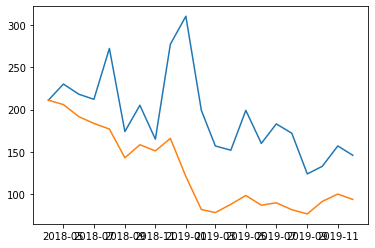

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)


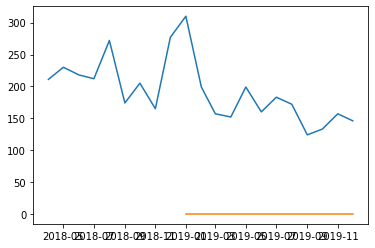

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_Sq)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

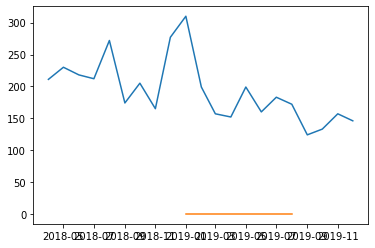

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_Cub)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
indexedDataset_logScale.head()

,Sales
Month,
2018-04-01,5.351858
2018-05-01,5.438079
2018-06-01,5.384495
2018-07-01,5.356586
2018-08-01,5.605802


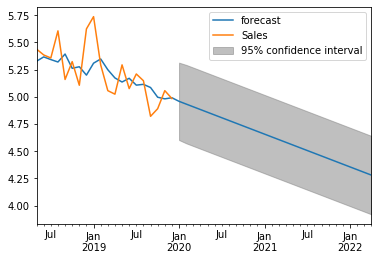

In [ ]:
results_ARIMAlog.plot_predict(1,48)
x=results_ARIMAlog.forecast(steps=120)

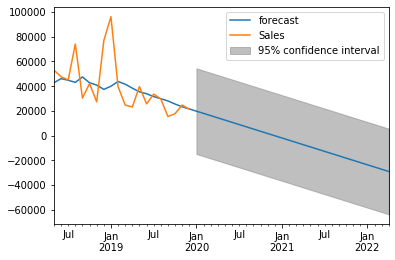

In [ ]:
results_ARIMASq.plot_predict(1,48)
x=results_ARIMASq.forecast(steps=120)

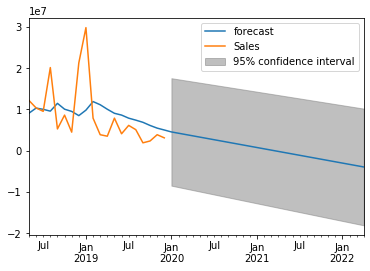

In [ ]:
results_ARIMACub.plot_predict(1,48)
x=results_ARIMACub.forecast(steps=120)

In [ ]:
results_ARIMAlog.forecast(steps=120)

(array([4.9580039 , 4.93280942, 4.90768223, 4.88256613, 4.85745185,
        4.83233788, 4.80722396, 4.78211005, 4.75699613, 4.73188222,
        4.70676831, 4.68165439, 4.65654048, 4.63142657, 4.60631266,
        4.58119874, 4.55608483, 4.53097092, 4.50585701, 4.48074309,
        4.45562918, 4.43051527, 4.40540136, 4.38028744, 4.35517353,
        4.33005962, 4.3049457 , 4.27983179, 4.25471788, 4.22960397,
        4.20449005, 4.17937614, 4.15426223, 4.12914832, 4.1040344 ,
        4.07892049, 4.05380658, 4.02869267, 4.00357875, 3.97846484,
        3.95335093, 3.92823701, 3.9031231 , 3.87800919, 3.85289528,
        3.82778136, 3.80266745, 3.77755354, 3.75243963, 3.72732571,
        3.7022118 , 3.67709789, 3.65198398, 3.62687006, 3.60175615,
        3.57664224, 3.55152832, 3.52641441, 3.5013005 , 3.47618659,
        3.45107267, 3.42595876, 3.40084485, 3.37573094, 3.35061702,
        3.32550311, 3.3003892 , 3.27527529, 3.25016137, 3.22504746,
        3.19993355, 3.17481963, 3.14970572, 3.12